In [1]:
import sys
sys.path.append('../')
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = torch.tensor(np.array(pd.read_csv('ar data.csv'))[:, 1:]).float()

In [3]:
data.shape

torch.Size([30000, 1])

In [4]:
pre_train, pre_val, pre_test = data[:15000], data[15000:17500], data[17500:]

In [5]:
n_x, n_y = 60, 40
train = []
for i in range(0, pre_train.shape[0]-n_x-n_y):
    try:
        train.append(torch.tensor(pre_train[i:(i+n_x+n_y)]))
    except:
        pass

train = torch.transpose(torch.cat(train, dim=1), 0, 1)

val = []
for i in range(0, pre_val.shape[0]-n_x-n_y):
    try:
        val.append(torch.tensor(pre_val[i:(i+n_x+n_y)]))
    except:
        pass

val = torch.transpose(torch.cat(val, dim=1), 0, 1)

test = []
for i in range(0, pre_test.shape[0]-n_x-n_y):
    try:
        test.append(torch.tensor(pre_test[i:(i+n_x+n_y)]))
    except:
        pass

test = torch.transpose(torch.cat(test, dim=1), 0,1)

C:\Users\pere9\AppData\Local\Temp\ipykernel_17880\1497678788.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train.append(torch.tensor(pre_train[i:(i+n_x+n_y)]))
C:\Users\pere9\AppData\Local\Temp\ipykernel_17880\1497678788.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val.append(torch.tensor(pre_val[i:(i+n_x+n_y)]))
C:\Users\pere9\AppData\Local\Temp\ipykernel_17880\1497678788.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test.append(torch.tensor(pre_test[i:(i+n_x+n_y)]))


In [6]:
data = {}

In [7]:
data['X_train'], data['Y_train'] = train[:, :n_x].unsqueeze(2), train[:, (n_x-1):].unsqueeze(2)
data['X_val'], data['Y_val'] = val[:, :n_x].unsqueeze(2), val[:, (n_x-1):].unsqueeze(2)
data['X_test'], data['Y_test'] = test[:, :n_x].unsqueeze(2), test[:, (n_x-1):].unsqueeze(2)

In [8]:
data['X_train'] = torch.cat([torch.arange(0, data['X_train'].shape[1]).repeat(
    data['X_train'].shape[0], 1).unsqueeze(2), data['X_train']], dim=2)

data['Y_train'] = torch.cat([torch.arange(0, data['Y_train'].shape[1]).repeat(
    data['Y_train'].shape[0], 1).unsqueeze(2), data['Y_train']], dim=2)

data['X_val'] = torch.cat([torch.arange(0, data['X_val'].shape[1]).repeat(
    data['X_val'].shape[0], 1).unsqueeze(2), data['X_val']], dim=2)

data['Y_val'] = torch.cat([torch.arange(0, data['Y_val'].shape[1]).repeat(
    data['Y_val'].shape[0], 1).unsqueeze(2), data['Y_val']], dim=2)

data['X_test'] = torch.cat([torch.arange(0, data['X_test'].shape[1]).repeat(
    data['X_test'].shape[0], 1).unsqueeze(2), data['X_test']], dim=2)

data['Y_test'] = torch.cat([torch.arange(0, data['Y_test'].shape[1]).repeat(
    data['Y_test'].shape[0], 1).unsqueeze(2), data['Y_test']], dim=2)

In [9]:
mean, std = data['X_train'][:, :, 1].mean(), data['X_train'][:, :, 1].std()

In [10]:
stats_data = {}
stats_data['mean'], stats_data['std'] = mean, std

In [11]:
torch.save(stats_data, 'stats_data.pt')

In [18]:
for dataset in data:
    data[dataset][:, :, 1] = (data[dataset][:, :, 1]-mean)/std

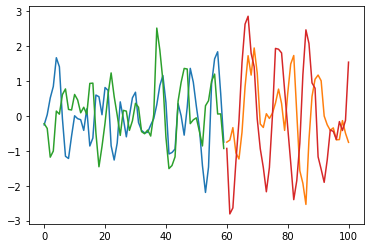

In [19]:
i = 1
plt.plot(data['X_val'][i, :, 0], data['X_val'][i, :, 1])
plt.plot(data['Y_val'][i, :, 0]+data['X_val'].shape[1], data['Y_val'][i, :, 1])

i = 1000
plt.plot(data['X_val'][i, :, 0], data['X_val'][i, :, 1])
plt.plot(data['Y_val'][i, :, 0]+data['X_val'].shape[1], data['Y_val'][i, :, 1])

In [20]:
torch.save(data, 'data.pt')

### Some data analysis

In [21]:
x = data['X_train'][:, -1:, 1:]
y = data['Y_train'][:, 1:, 1:]

In [22]:
inc = torch.ones(y.shape)*x
inc_ = y-inc
inc_max = torch.max(inc_, dim=1)[0].squeeze(1)

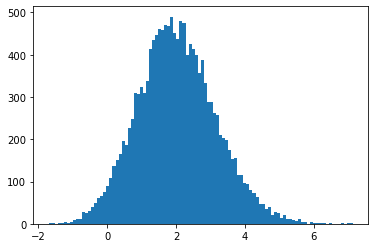

In [23]:
a = plt.hist(inc_max.numpy(), bins=100)

In [24]:
np.quantile(inc_max, 0.99)

4.87627115249634

In [25]:
inc_min = torch.min(inc_, dim=1)[0].squeeze(1)

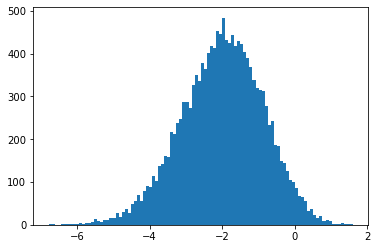

In [26]:
a = plt.hist(inc_min.numpy(), bins=100)

In [27]:
np.quantile(inc_min, 0.01)

-4.864749345779419